# KALEEM WAHEED  18L-1811 Project 2

### Import Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import optimizers

C:\Users\Sh-Ma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Enable Intellisense

In [205]:
%config IPCompleter.greedy=True

## Global Variable 

In [2]:
data = []
labels = []
im_width = 64
im_height = 64
num_classes = 7

# PreProcessing Data

### Generate new images Handle Class Balance Issue 
#### Now each class have 1833 images 
#### Remove noise/Irrelevent Images 

In [3]:
for i in range(7):
    path=os.getcwd()+"/Project2Data/"+str(i+1)+'/'
    print(path)
    progress = 0
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    for file_name in image_files:
        image_file = str(path + file_name)
        img = cv2.imread(image_file,cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img,(im_width,im_height))
        data.append(new_img)
        progress = progress+1
#         print(int(path[-2]))
        labels.append(int(path[-2])-1)
        if progress%100==0:
            print('Progress '+str(progress)+' Image done of Disease type:'  + path[-2])

F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2Data/1/
Progress 100 Image done of Disease type:1
Progress 200 Image done of Disease type:1
Progress 300 Image done of Disease type:1
Progress 400 Image done of Disease type:1
Progress 500 Image done of Disease type:1
Progress 600 Image done of Disease type:1
Progress 700 Image done of Disease type:1
Progress 800 Image done of Disease type:1
Progress 900 Image done of Disease type:1
Progress 1000 Image done of Disease type:1
Progress 1100 Image done of Disease type:1
Progress 1200 Image done of Disease type:1
Progress 1300 Image done of Disease type:1
Progress 1400 Image done of Disease type:1
Progress 1500 Image done of Disease type:1
Progress 1600 Image done of Disease type:1
Progress 1700 Image done of Disease type:1
Progress 1800 Image done of Disease type:1
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2Data/2/
Progress 100 Image done of Disease type:2
Progress 200 Image done of Disease type

In [4]:
data = np.array(data)
print(data.shape)

(12831, 64, 64)


In [5]:
labels = np.array(labels)
labels.shape

(12831,)

In [6]:
data = data.reshape((data.shape)[0],(data.shape)[1],(data.shape)[2],1)
data.shape

(12831, 64, 64, 1)

In [7]:
from keras.utils import np_utils

In [8]:
labels.astype('uint8')
labels = keras.utils.to_categorical(labels, num_classes)

# Shuffle Data

In [9]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)



In [10]:
for i in range(10):
    shuffle(data,labels)

### Building Convolutional Neural Network  Model 1
#### batch size 100 , epoch 50  , Adam optimizer Default Learning Rate

In [16]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=64,input_shape=(64,64,1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(2,2),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=64))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(128,activation="relu"))
model.add(Dense(7,activation="softmax"))
model.summary()
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 32)        18464     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          8256      
__________

# Fit model

In [13]:
history = model.fit(data, labels,
          batch_size=100,
          epochs=50,
          verbose=1, shuffle = True,validation_split=0.30)

Train on 8981 samples, validate on 3850 samples
Epoch 1/50
8981/8981 [==============================] - 66s 7ms/step - loss: 2.7555 - acc: 0.1953 - val_loss: 1.8197 - val_acc: 0.3044
Epoch 2/50
8981/8981 [==============================] - 53s 6ms/step - loss: 1.7289 - acc: 0.3274 - val_loss: 1.5590 - val_acc: 0.4556
Epoch 3/50
8981/8981 [==============================] - 53s 6ms/step - loss: 1.5329 - acc: 0.4160 - val_loss: 1.3850 - val_acc: 0.5055
Epoch 4/50
8981/8981 [==============================] - 54s 6ms/step - loss: 1.3893 - acc: 0.4766 - val_loss: 1.2583 - val_acc: 0.5423
Epoch 5/50
8981/8981 [==============================] - 53s 6ms/step - loss: 1.2859 - acc: 0.5222 - val_loss: 1.1353 - val_acc: 0.5909
Epoch 6/50
8981/8981 [==============================] - 53s 6ms/step - loss: 1.2267 - acc: 0.5488 - val_loss: 1.0711 - val_acc: 0.6151
Epoch 7/50
8981/8981 [==============================] - 53s 6ms/step - loss: 1.1394 - acc: 0.5732 - val_loss: 1.0313 - val_acc: 0.6301
Epoch 8

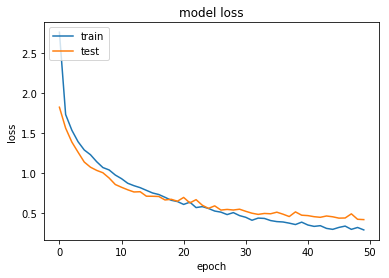

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

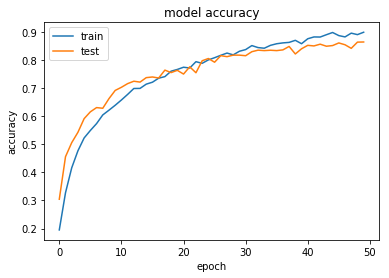

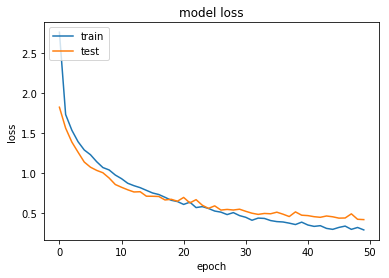

In [15]:
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
(loss, accuracy) = model.evaluate(data, labels, batch_size=batchsize, verbose=1)


12831/12831 [==============================] - 24s 2ms/step


## Building Convolutional Neural Network  Model  Architecture 2
#### use loss = 'categorical_crossentropy' batch size 100 , epoch 60  ,Optimizer   Adam Default Learning Rate

In [24]:

model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=64,input_shape=(64,64,1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(2,2),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=64))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(128,activation="relu"))
model.add(Dense(7,activation="softmax"))
model.summary()
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 31, 31, 32)        18464     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          8256      
__________

In [12]:
batchsize=100
epochs=60

In [13]:
history = model.fit(data, labels,
          batch_size=batchsize,
          epochs=epochs,
          verbose=1, shuffle = True,validation_split=0.30)

Train on 8981 samples, validate on 3850 samples
Epoch 1/60
8981/8981 [==============================] - 67s 7ms/step - loss: 2.3655 - acc: 0.2044 - val_loss: 1.8000 - val_acc: 0.3249
Epoch 2/60
8981/8981 [==============================] - 54s 6ms/step - loss: 1.6596 - acc: 0.3648 - val_loss: 1.4690 - val_acc: 0.4306
Epoch 3/60
8981/8981 [==============================] - 55s 6ms/step - loss: 1.4435 - acc: 0.4594 - val_loss: 1.3206 - val_acc: 0.5127
Epoch 4/60
8981/8981 [==============================] - 53s 6ms/step - loss: 1.3448 - acc: 0.4973 - val_loss: 1.2585 - val_acc: 0.5332
Epoch 5/60
8981/8981 [==============================] - 54s 6ms/step - loss: 1.2389 - acc: 0.5366 - val_loss: 1.1519 - val_acc: 0.5748
Epoch 6/60
8981/8981 [==============================] - 54s 6ms/step - loss: 1.1585 - acc: 0.5703 - val_loss: 1.1456 - val_acc: 0.5673
Epoch 7/60
8981/8981 [==============================] - 53s 6ms/step - loss: 1.1022 - acc: 0.5872 - val_loss: 1.0020 - val_acc: 0.6273
Epoch 8

In [14]:
(loss, accuracy) = model.evaluate(data, labels, batch_size=batchsize, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

12831/12831 [==============================] - 25s 2ms/step
accuracy: 95.14%


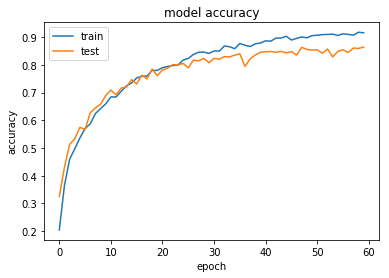

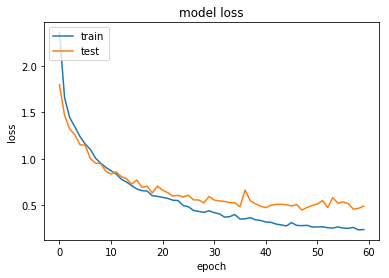

In [15]:
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Transfer learning on ResNet 

## Variable 

In [2]:
data = []
labels = []
im_width = 64
im_height = 64
num_classes = 7

# Use provided Data 
### Remove irrelevent/Noise Data

In [3]:
for i in range(7):
    path=os.getcwd()+"/Project2DataClean/"+str(i+1)+'/'
    print(path)
    progress = 0
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    for file_name in image_files:
        image_file = str(path + file_name)
        img = cv2.imread(image_file)
        new_img = cv2.resize(img,(im_width,im_height))
        data.append(new_img)
        progress = progress+1
#         print(int(path[-2]))
        labels.append(int(path[-2])-1)
        if progress%100==0:
            print('Progress '+str(progress)+' Image done of Disease type:'  + path[-2])

F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/1/
Progress 100 Image done of Disease type:1
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/2/
Progress 100 Image done of Disease type:2
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/3/
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/4/
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/5/
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/6/
Progress 100 Image done of Disease type:6
Progress 200 Image done of Disease type:6
Progress 300 Image done of Disease type:6
Progress 400 Image done of Disease type:6
Progress 500 Image done of Disease type:6
Progress 600 Image done of Disease type:6
Progress 700 Image done of Disease type:6
Progress 800 Image done of Disease type:6
Progress 900 Image done of Disease type:6
Progress 1000 Image done of Disease type:6
Pro

# Use Channel 3

In [4]:
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))
print(data.shape)
print(labels.shape)

2317
2317
(2317, 64, 64, 3)
(2317,)


In [5]:
data = data.astype('uint8')
labels = keras.utils.to_categorical(labels, 7)
print(labels.shape)

(2317, 7)


In [25]:
import numpy as np
import os
import time
#from resnet50 import ResNet50
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
#from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

C:\Users\Sh-Ma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#Shuffle the dataset
x,y = shuffle(data,labels, random_state=2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Keras ResNet50 Model 1 With Transfer learning
### Input(shape=(64, 64, 3)),include_top=False,weights='imagenet'
### batch_size=40, epochs=15 Dropout 0.6 and 0.4
#### Don't want to train all model 
#####  Last 5 layer retrain  


In [136]:
image_input = Input(shape=(64, 64, 3))
model = keras.applications.resnet50.ResNet50(input_tensor=image_input, include_top=False,weights='imagenet')

C:\Users\Sh-Ma\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [137]:
last_layer = model.output

In [138]:

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)


In [139]:
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)


In [141]:
x = Dropout(0.4)(x)
x = Dense(128, activation='relu',name='fc-2')(x)
x = Dropout(0.6)(x)
# a softmax layer for  7 classes
out = Dense(7, activation='softmax',name='output_layer')(x)

In [94]:
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [95]:
for layer in custom_resnet_model2.layers[:-5]:
	layer.trainable = False

In [96]:
custom_resnet_model2.layers[-1].trainable

custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [97]:
t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=40, epochs=15, verbose=1, validation_data=(X_test, y_test))

Train on 1853 samples, validate on 464 samples
Epoch 1/15
1853/1853 [==============================] - 50s 27ms/step - loss: 1.1671 - acc: 0.7437 - val_loss: 0.6049 - val_acc: 0.8039
Epoch 2/15
1853/1853 [==============================] - 15s 8ms/step - loss: 0.7090 - acc: 0.8009 - val_loss: 0.5801 - val_acc: 0.8448
Epoch 3/15
1853/1853 [==============================] - 15s 8ms/step - loss: 0.5853 - acc: 0.8251 - val_loss: 0.6037 - val_acc: 0.8578
Epoch 4/15
1853/1853 [==============================] - 15s 8ms/step - loss: 0.5261 - acc: 0.8408 - val_loss: 0.6003 - val_acc: 0.8685
Epoch 5/15
1853/1853 [==============================] - 15s 8ms/step - loss: 0.4593 - acc: 0.8602 - val_loss: 0.5992 - val_acc: 0.8642
Epoch 6/15
1853/1853 [==============================] - 15s 8ms/step - loss: 0.4286 - acc: 0.8645 - val_loss: 0.5813 - val_acc: 0.8642
Epoch 7/15
1853/1853 [==============================] - 14s 8ms/step - loss: 0.3653 - acc: 0.8770 - val_loss: 0.6013 - val_acc: 0.8707
Epoch 8

In [99]:
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(X_test, y_test, batch_size=32, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Training time: -307.366849899292
464/464 [==============================] - 3s 7ms/step
[INFO] loss=0.9091, accuracy: 86.4224%


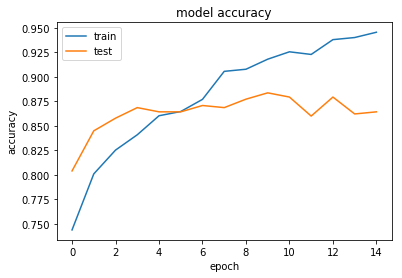

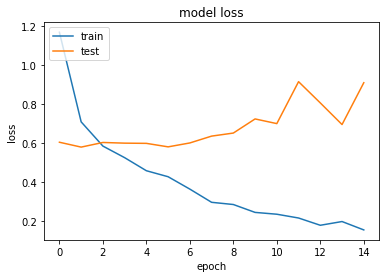

In [103]:
#accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Keras ResNet50 
### Input(shape=(64, 64, 3)),include_top=False,weights='imagenet'
###  batch_size=38, epochs=25 Remove fully-connected 2nd last dense layer
#### loss='categorical_crossentropy',optimizer='adam'
#### Don't want to train all model 
#####  Last 3 layer retrain  

In [27]:
image_input = Input(shape=(64, 64, 3))
model = keras.applications.resnet50.ResNet50(input_tensor=image_input, include_top=False,weights='imagenet')

C:\Users\Sh-Ma\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [60]:
last_layer = model.output


In [142]:
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
#x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu',name='fc-2')(x)
x = Dropout(0.4)(x)
# a softmax layer for 7 classes
out = Dense(7, activation='softmax',name='output_layer')(x)

In [62]:
custom_resnet_model2 = Model(inputs=model.input, outputs=out)
custom_resnet_model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [63]:
for layer in custom_resnet_model2.layers[:-3]:
	layer.trainable = False

In [64]:
custom_resnet_model2.layers[-1].trainable
custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
t=time.time()
history = custom_resnet_model2.fit(X_train, y_train, batch_size=38, epochs=25, verbose=1, validation_data=(X_test, y_test))

Train on 1853 samples, validate on 464 samples
Epoch 1/25
1853/1853 [==============================] - 70s 38ms/step - loss: 1.5459 - acc: 0.7232 - val_loss: 0.6151 - val_acc: 0.8147
Epoch 2/25
1853/1853 [==============================] - 48s 26ms/step - loss: 0.7419 - acc: 0.8095 - val_loss: 0.5617 - val_acc: 0.8384
Epoch 3/25
1853/1853 [==============================] - 48s 26ms/step - loss: 0.5861 - acc: 0.8381 - val_loss: 0.5202 - val_acc: 0.8534
Epoch 4/25
1853/1853 [==============================] - 48s 26ms/step - loss: 0.5567 - acc: 0.8332 - val_loss: 0.5139 - val_acc: 0.8491
Epoch 5/25
1853/1853 [==============================] - 48s 26ms/step - loss: 0.4887 - acc: 0.8494 - val_loss: 0.5315 - val_acc: 0.8578
Epoch 6/25
1853/1853 [==============================] - 48s 26ms/step - loss: 0.4568 - acc: 0.8640 - val_loss: 0.5953 - val_acc: 0.8362
Epoch 7/25
1853/1853 [==============================] - 48s 26ms/step - loss: 0.4146 - acc: 0.8699 - val_loss: 0.6077 - val_acc: 0.8621
E

In [66]:
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(X_test, y_test, batch_size=32, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Training time: -1231.0342094898224
464/464 [==============================] - 20s 43ms/step
[INFO] loss=0.6937, accuracy: 86.6379%


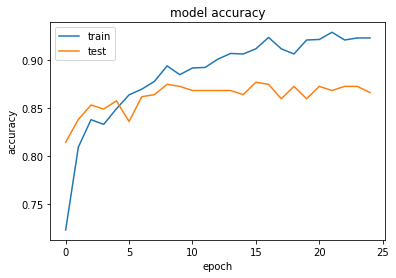

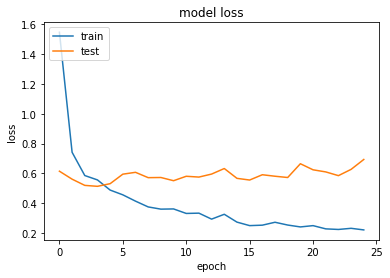

In [67]:
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# GoogleNet  InceptionV3
### Input(shape=(150, 150, 3)),include_top=False,weights='imagenet'
### batch_size=30, epochs=20 Remove fully-connected 2nd last dense layer
#### loss='categorical_crossentropy',optimizer='adam'
#### Don't want to train all model 
#####  Last 3 layer retrain  

In [120]:
import numpy as np
import os
import time
#from resnet50 import ResNet50
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

#from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [121]:
data = []
labels = []
im_width = 150
im_height = 150
num_classes = 7

In [122]:
for i in range(7):
    path=os.getcwd()+"/Project2DataClean/"+str(i+1)+'/'
    print(path)
    progress = 0
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    for file_name in image_files:
        image_file = str(path + file_name)
        img = cv2.imread(image_file)
        new_img = cv2.resize(img,(im_width,im_height))
        data.append(new_img)
        progress = progress+1
#         print(int(path[-2]))
        labels.append(int(path[-2])-1)
        if progress%100==0:
            print('Progress '+str(progress)+' Image done of Disease type:'  + path[-2])

F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/1/
Progress 100 Image done of Disease type:1
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/2/
Progress 100 Image done of Disease type:2
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/3/
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/4/
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/5/
F:\University\Semester1\Deep Learning\Project\Project 2\Code/Project2DataClean/6/
Progress 100 Image done of Disease type:6
Progress 200 Image done of Disease type:6
Progress 300 Image done of Disease type:6
Progress 400 Image done of Disease type:6
Progress 500 Image done of Disease type:6
Progress 600 Image done of Disease type:6
Progress 700 Image done of Disease type:6
Progress 800 Image done of Disease type:6
Progress 900 Image done of Disease type:6
Progress 1000 Image done of Disease type:6
Pro

In [123]:
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))
print(data.shape)
print(labels.shape)

2317
2317
(2317, 150, 150, 3)
(2317,)


In [124]:
data = data.astype('uint8')
labels = keras.utils.to_categorical(labels, 7)
print(labels.shape)

(2317, 7)


In [125]:
x,y = shuffle(data,labels, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [126]:
image_input = Input(shape=(150, 150, 3))
model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

In [127]:
last_layer = model.output

In [128]:
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
# x = Dense(128, activation='relu',name='fc-1')(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu',name='fc-2')(x)
x = Dropout(0.9)(x)
# a softmax layer for 7 classes
out = Dense(7, activation='softmax',name='output_layer')(x)

In [129]:
custom_resnet_model2 = Model(inputs=model.input, outputs=out)
custom_resnet_model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_392 (Conv2D)             (None, 74, 74, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 74, 74, 32)   96          conv2d_392[0][0]                 
__________________________________________________________________________________________________
activation_426 (Activation)     (None, 74, 74, 32)   0           batch_normalization_377[0][0]    
__________________________________________________________________________________________________
conv2d_393

In [130]:
for layer in custom_resnet_model2.layers[:-5]:
	layer.trainable = False

In [131]:
custom_resnet_model2.layers[-1].trainable
custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [132]:
t=time.time()
history = custom_resnet_model2.fit(X_train, y_train, batch_size=30, epochs=15, verbose=1, validation_data=(X_test, y_test))

Train on 1853 samples, validate on 464 samples
Epoch 1/15
1853/1853 [==============================] - 43s 23ms/step - loss: 1.8310 - acc: 0.6465 - val_loss: 3.4390 - val_acc: 0.7866
Epoch 2/15
1853/1853 [==============================] - 30s 16ms/step - loss: 1.1984 - acc: 0.7652 - val_loss: 3.4390 - val_acc: 0.7866
Epoch 3/15
1853/1853 [==============================] - 30s 16ms/step - loss: 1.0619 - acc: 0.7868 - val_loss: 3.4390 - val_acc: 0.7866
Epoch 4/15
1853/1853 [==============================] - 30s 16ms/step - loss: 1.0281 - acc: 0.7890 - val_loss: 3.4390 - val_acc: 0.7866
Epoch 5/15
1853/1853 [==============================] - 30s 16ms/step - loss: 0.9385 - acc: 0.7917 - val_loss: 3.4390 - val_acc: 0.7866
Epoch 6/15
1853/1853 [==============================] - 30s 16ms/step - loss: 0.9034 - acc: 0.7922 - val_loss: 3.4390 - val_acc: 0.7866
Epoch 7/15
1853/1853 [==============================] - 30s 16ms/step - loss: 0.8836 - acc: 0.7917 - val_loss: 3.4390 - val_acc: 0.7866
E

In [134]:
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(X_test, y_test, batch_size=33, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Training time: -583.1648933887482
464/464 [==============================] - 6s 14ms/step
[INFO] loss=3.4390, accuracy: 78.6638%


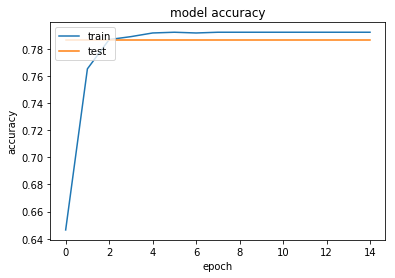

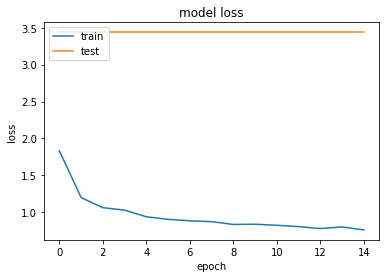

In [135]:
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#  CNN Model 2   (60 Epochs)
## Training Accuracy: 0.9159 validation accuracy: 0.8642

# ResNet Model 1(15 Epochs)  
### Training Accuracy: 0.9455 validation accuracy: 0.86

# GoogleNet
### Training Accuracy: 0.79 validation accuracy: 0.78

# GoogleNet(Colab)
### with different dataset 
### Training Accuracy: 0.85 validation accuracy: 0.13